<a href="https://colab.research.google.com/github/pragyas03/Automated-Exam-Panel-System/blob/testing/Pattern_Recognition_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAME: PRAGYA SHARMA
#CSULB ID: 027955796


---



---



#**End of the Semester Project – CECS550 Spring 2021**



---


---



## > Objective: To build meaningful classification model on the given dataset


##> Dataset: Breast Cancer Wisconsin (Diagnostic) Dataset




In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
from sklearn import preprocessing
plt.style.use("ggplot")
import warnings
import itertools
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
data = pd.read_csv('breast-cancer-wisconsin.csv', na_values='?')
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitosis","Diagnosis"]
data.columns = headers
del data['ID']
print(data['Diagnosis'].value_counts(),"\n")
print("2 -> Benign, 4 -> Malignant")

2    458
4    241
Name: Diagnosis, dtype: int64 

2 -> Benign, 4 -> Malignant


In [83]:
original_data = data
data.iloc[:,9].replace(2, 1,inplace=True)
data.iloc[:,9].replace(4, 0,inplace=True)
data

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitosis,Diagnosis
0,5,1,1.0,1,2.0,1.0,3,1,1,1
1,5,4,4.0,5,7.0,10.0,3,2,1,1
2,3,1,1.0,1,2.0,2.0,3,1,1,1
3,6,8,8.0,1,3.0,4.0,3,7,1,1
4,4,1,1.0,3,2.0,1.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1.0,1,3.0,2.0,1,1,1,1
695,2,1,1.0,1,2.0,1.0,1,1,1,1
696,5,10,10.0,3,7.0,3.0,8,10,2,0
697,4,8,6.0,4,3.0,4.0,10,6,1,0


#MISSING DATA ANALYSIS


##> Missing data points are those having "?" or "NaN" in place of the data values 


In [84]:
#Is there missing data?
if data.isnull().values.any():
  print("There are missing values in the data.")
print("The total number of missing values are: ", data.isnull().sum().sum())
print("The missing data points are:")
data.isnull().sum()

There are missing values in the data.
The total number of missing values are:  18
The missing data points are:


CT            0
UCSize        0
UCShape       1
MA            0
SECSize       1
BN           16
BC            0
NN            0
Mitosis       0
Diagnosis     0
dtype: int64

#Can we afford to remove data points?


---


## > When there are missing values in the dataset, one way of handling these missing values is to delete that particular record consisting of missing values. However, the removal of data points should only be practiced when the dataset is huge, i.e., it consists of millions of records. 

## > Since, the dataset used in this project is small, hence, removal of data points could not be afforded. This is because every record in such datasets specifies a huge amount of information which in turns helps the model to learn more about that dataset.









#Do we use imputation (and introduce additional uncertainty)?


---


##> The imputation technique can be used for replacing the missing values. This is done in order to improve the decision making. 


##> The technique of imputation introduces additional uncertainity. That is the reaseon why a balanced imputation is required. 





#FEATURES ENGINEERING

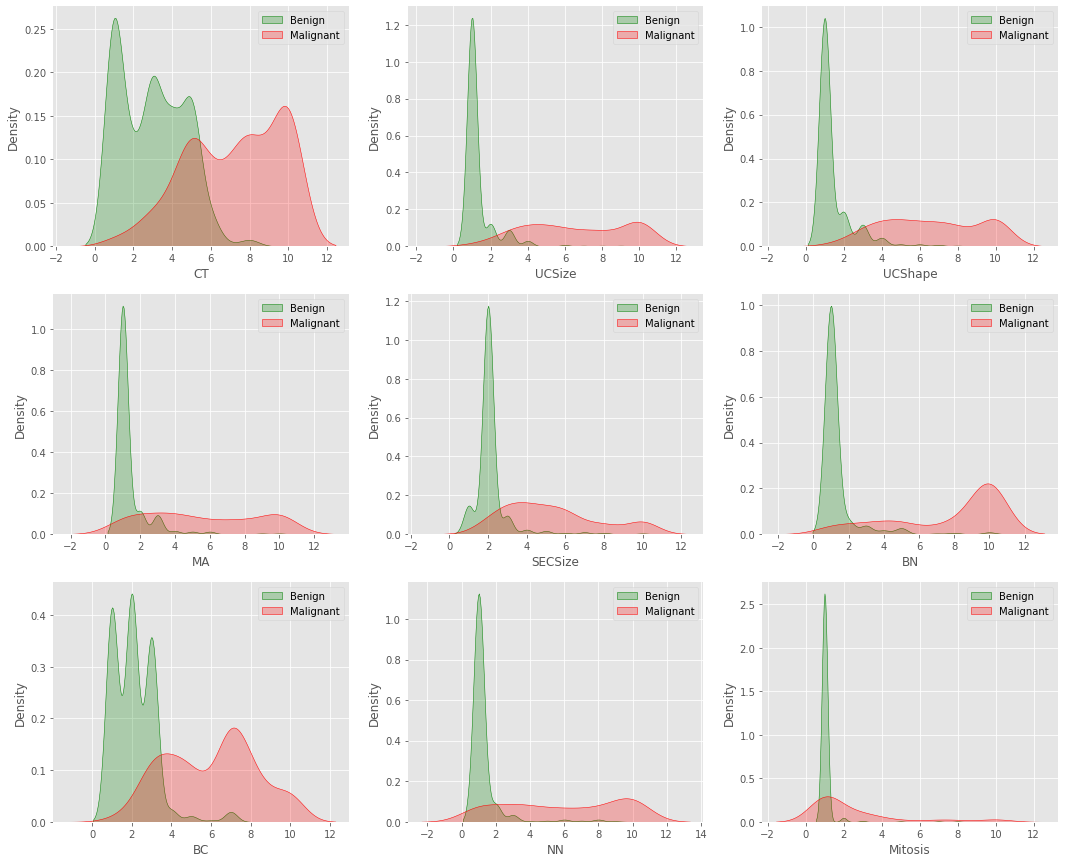

In [85]:
#Features distribution plot (for all features)
# visual_data = data.copy()

# visual_data.iloc[:,9].replace(1, 'Benign',inplace=True)
# visual_data.iloc[:,9].replace(0, 'Malignant',inplace=True)

list_of_features = data.drop(['Diagnosis'],axis=1).columns.tolist()
#Set up of the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.despine(left=True)

a = data[data['Diagnosis']==1]
b = data[data['Diagnosis']==0]

for i in range(0,len(list_of_features)):
    y=i%3;
    x=int(i/3)
    sns.distplot(a[list_of_features[i]],  hist=False, color="g", kde_kws={"shade": True}, ax=axes[x, y],label='Benign')
    sns.distplot(b[list_of_features[i]],  hist=False, color="r", kde_kws={"shade": True}, ax=axes[x, y],label='Malignant')
    axes[x,y].legend()

#Histogram and kernel density estimate - Plot
plt.show()

In [86]:
#Scaling
dataset = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(dataset)
headers.remove("ID")
data = pd.DataFrame(dataset_scaled,columns=headers)
data['Diagnosis'] = data['Diagnosis'].values.astype(np.int64)
data.head()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitosis,Diagnosis
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,1
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,1
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,1
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,1
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,1


In [87]:
#Imputation 
temp = data[data.isna().any(axis=1)].index.tolist()
data['BN'].fillna(data['BN'].mean(),inplace=True)
data['SECSize'].fillna(data['SECSize'].mean(),inplace=True)
data['UCShape'].fillna(data['UCShape'].mean(),inplace=True)
data.iloc[temp] 

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitosis,Diagnosis
23,0.777778,0.333333,0.444444,0.000000,0.111111,0.28274,0.666667,0.222222,0.0,0
40,0.555556,0.555556,0.555556,0.888889,0.555556,0.28274,0.666667,0.777778,0.0,1
139,0.000000,0.000000,0.000000,0.000000,0.000000,0.28274,0.111111,0.000000,0.0,1
145,0.000000,0.000000,0.222222,0.000000,0.111111,0.28274,0.111111,0.000000,0.0,1
158,0.000000,0.000000,0.111111,0.000000,0.222222,0.28274,0.000000,0.000000,0.0,1
164,0.444444,0.000000,0.000000,0.000000,0.111111,0.28274,0.222222,0.000000,0.0,1
235,0.222222,0.000000,0.333333,0.000000,0.111111,0.28274,0.222222,0.000000,0.0,1
249,0.222222,0.000000,0.000000,0.000000,0.111111,0.28274,0.222222,0.000000,0.0,1
275,0.222222,0.000000,0.222222,0.000000,0.111111,0.28274,0.111111,0.000000,0.0,1
292,0.777778,0.777778,0.777778,0.000000,0.111111,0.28274,0.555556,1.000000,0.0,0


In [88]:
visual_data = data.copy()

visual_data.iloc[:,9].replace(1, 'Benign',inplace=True)
visual_data.iloc[:,9].replace(0, 'Malignant',inplace=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

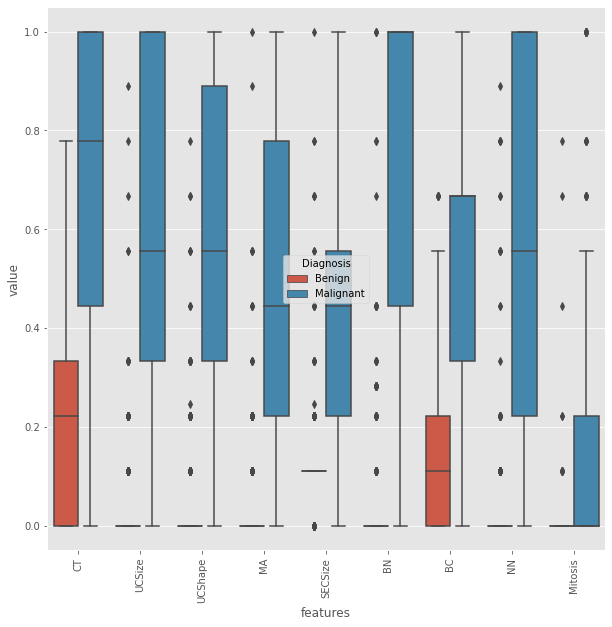

In [89]:
#Handling Outliers 

data_box_plot = pd.melt(visual_data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Diagnosis", data=data_box_plot)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

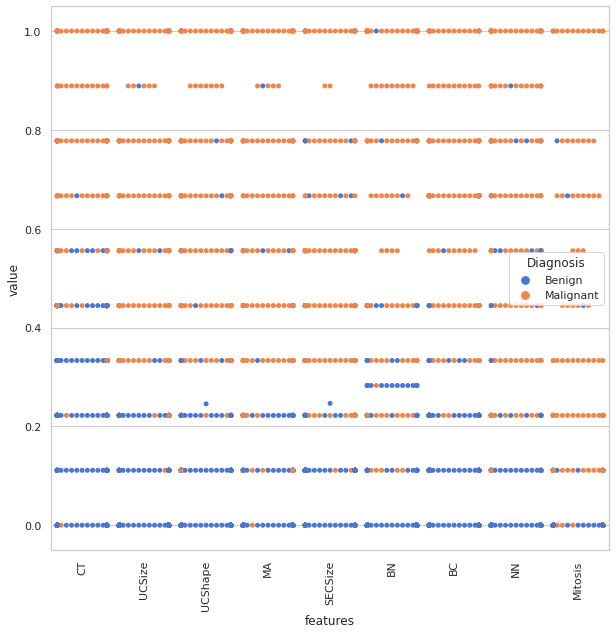

In [90]:
import time
sns.set(style="whitegrid", palette="muted")

# uncomment to see swarm visualization of data after standartization of data
# y = data['Diagnosis']
# x = data.drop(columns=['Diagnosis'])
# data_dia = y
# data_x = x
# data_n_2 = (data_x - data_x.mean()) / (data_x.std())              # standardization
# data_x = pd.concat([y,data_n_2],axis=1) 

# comment next line with uncommenting above lines for standartization results
data_x = visual_data

data_x = pd.melt(data_x,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data_x)

plt.xticks(rotation=90)


In [ ]:
# from the swarm result it is clear that in most of the features, diagnosis 0 exists.

#FEATURE ANALYSIS

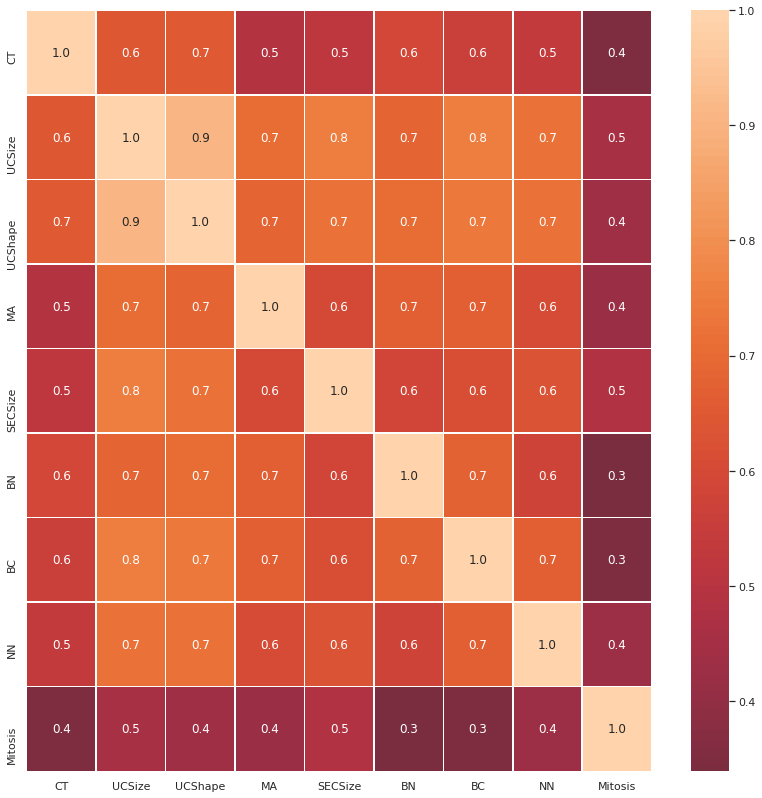

In [91]:
#Correlation Analysis - Generation of a heap map plot for all features
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.iloc[:,:-1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,center=0)

In [92]:
#Univariate Selection in Scikit - Select K Best class from Scikit that can be used to choose n best features
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)

univs = SelectKBest(f_classif, k=4)
X_train_f = univs.fit_transform(X_train, y_train)
a = univs.get_support()
b = X.columns.tolist()
for i in zip(a,b):
    print(i[1]+' -> '+str(i[0]))

CT -> False
UCSize -> True
UCShape -> True
MA -> False
SECSize -> False
BN -> True
BC -> True
NN -> False
Mitosis -> False


Explained variation per principal component: [0.69 0.07] 



<Figure size 432x288 with 0 Axes>

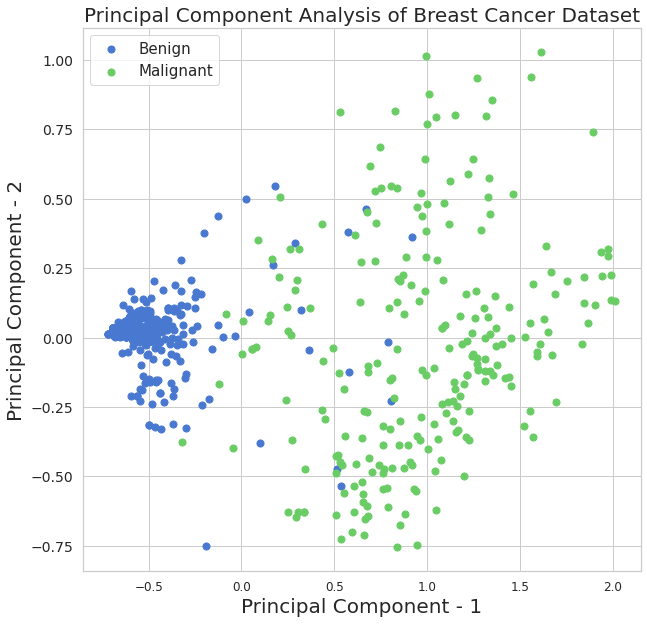

In [93]:
#Principal Component Analysis (PCA) - Running PCA and plotting the PC1 and PC2 for two categories
pca_breast = PCA(n_components=2)
X_new = pca_breast.fit_transform(X)
principal_df = pd.DataFrame(data = X_new, columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_),"\n")
# principal component 1 holds 68.9% of the information 
# while the principal component 2 holds only 7.3% of the information.
# 23.8% information was lost.

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign','Malignant']
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = visual_data['Diagnosis'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'principal component 1']
               , principal_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
#Malignant class is spread out as compared to the Benign class.

#kNN MODEL

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 1)
Y_train = y_train.astype('int')
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

[[ 53   4]
 [  1 117]]
Normalized confusion matrix
[[0.93 0.07]
 [0.01 0.99]]


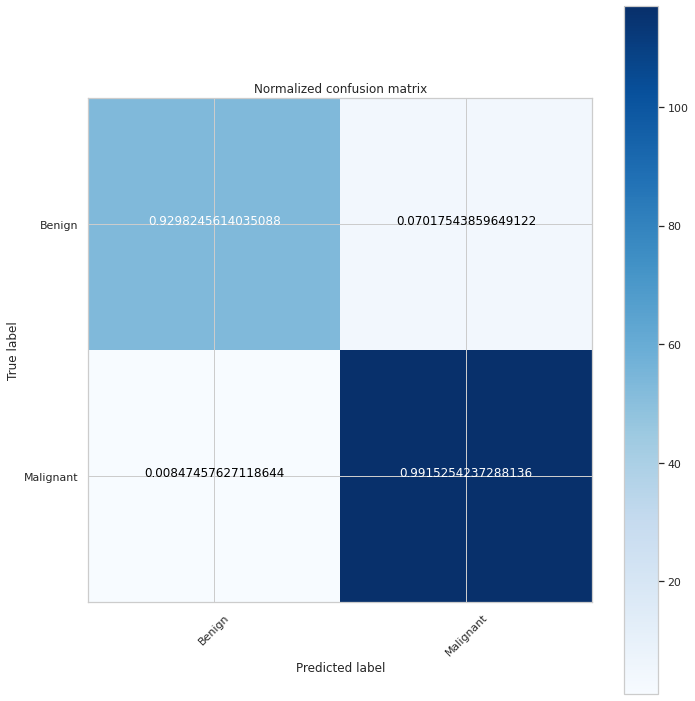

In [95]:
#Making Prediction
y_predicted = classifier.predict(X_test)
#Forming the confusion matrix for KNN Model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize = True, title='Normalized confusion matrix')
plt.show()

In [96]:
#Calculating the accuracy
print("Accuracy (in percentage) : %0.2f" %((metrics.accuracy_score(y_test, y_predicted))*100),"%")

Accuracy (in percentage) : 97.14 %




#> Identifying the best number of neighbors



The optimal number of neighbors is 5.
Accuracy is 98.29 %


A plot that indicates k in x axis and accuracy in y axis.



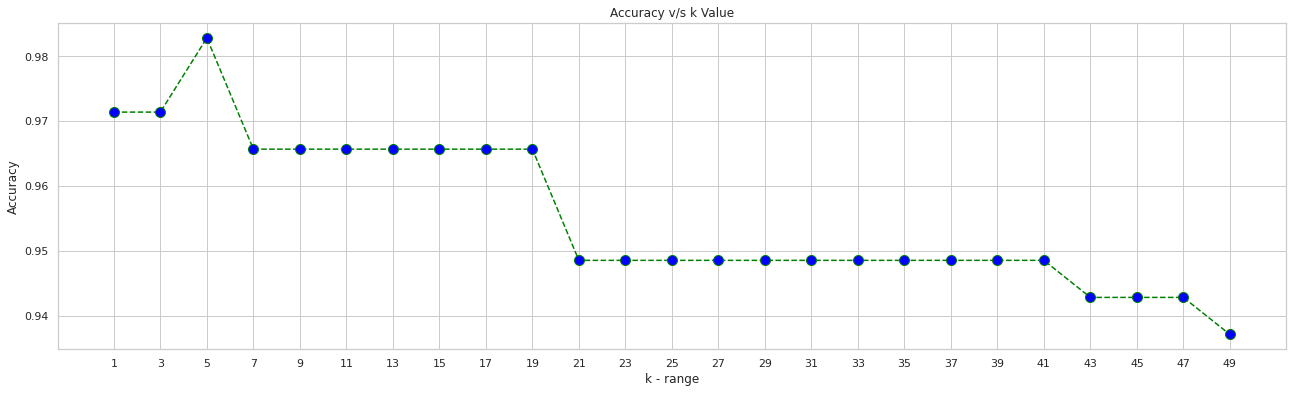

In [97]:
#Creating list of k for kNN
k_list = list(range(1,50,2))
#Creating list of cv scores
scores = []
acc = []
#Performing 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, predict))
    acc.append(metrics.accuracy_score(y_test, predict))
#Finding best k
#MSE: MEAN SQUARED ERROR
MSE = [1 - x for x in scores]
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)
print("Accuracy is %0.2f" % ((max(acc))*100), "%")
print("\n") 
plt.figure(figsize=(22,6))
plt.plot(range(1,50,2),acc,color = 'green',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(min(k_list), max(k_list)+1, 2.0)) 
plt.title("Accuracy v/s k Value")
plt.xlabel("k - range")
plt.ylabel("Accuracy")
print("A plot that indicates k in x axis and accuracy in y axis.\n")

#SVM Model

In [98]:
svm_data = data.copy()

svm_data.iloc[:,9].replace(1, 'Benign',inplace=True)
svm_data.iloc[:,9].replace(0, 'Malignant',inplace=True)

svm_X = svm_data.iloc[:,0:9]
svm_y = svm_data['Diagnosis']

class_names = list(svm_y.unique())

In [99]:
X_train, X_test, y_train, y_test = train_test_split(svm_X, svm_y, test_size=0.25, random_state=1)

In [100]:
svc = SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
svc.fit(X,y) 
y_pred = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train,y_train), svc.score(X_test, y_test)

(0.9637404580152672, 0.96)

Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


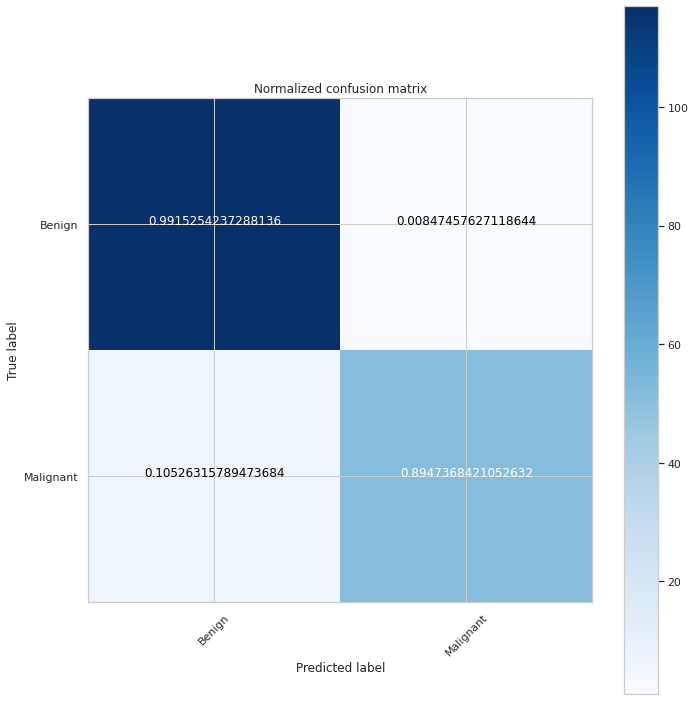

In [101]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision = 2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize = True, title='Normalized confusion matrix')
plt.show()

#EVALUATION OF THE TWO MODELS (kNN and SVM) on the given dataset

In [58]:
# Create X and y datasets
X = np.array(data.drop(['Diagnosis'], 1))
y = np.array(data['Diagnosis'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [ ]:
# Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []
for name, model in models:
    print('Method: {}'.format(name))
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Make prediction on the test dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

In [ ]:
# last element is mitosis, higher the mitosis higher the likeyhood of cancer
example = np.array([[1, 1, 1, 1, 1, 1, 6, 7, 3]])

# orignal data
#examples = X

# reshape example to make it a column vector
example = example.reshape(len(example), -1)
for name, model in models:
    prediction = model.predict(example)
    if prediction == 2:
        result = 'benign'
    else:
        result = 'malignant'       
    print(name)
    print('The cancer is ' + result)

In [66]:
data.sample(10)

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitosis,Diagnosis
419,2,3,1.0,1,5.0,1.0,1,1,1,1
346,5,2,2.0,2,3.0,1.0,1,3,1,1
478,5,2,1.0,1,2.0,1.0,1,1,1,1
407,1,1,1.0,1,2.0,1.0,2,1,1,1
186,1,5,8.0,6,5.0,8.0,7,10,1,0
621,6,3,3.0,3,3.0,2.0,6,1,1,1
416,8,7,8.0,5,10.0,10.0,7,2,1,0
670,3,10,7.0,8,5.0,8.0,7,4,1,0
321,3,1,1.0,1,2.0,NaN,3,1,1,1
237,9,8,8.0,5,6.0,2.0,4,10,4,0
